<a href="https://colab.research.google.com/github/Mujthaba-GM/AI_ML-Program/blob/main/day2-01.07.2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python


Image downloaded!


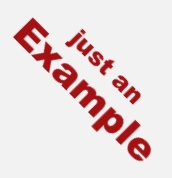

In [11]:
#download the image and show
import urllib.request
import cv2
from google.colab.patches import cv2_imshow

# Step 1: Download the image
url = 'https://upload.wikimedia.org/wikipedia/commons/a/a9/Example.jpg'
#urllib.request.urlretrieve(url, 'downloaded_image.jpg')
print("Image downloaded!")

# Step 2: Load and show the image using OpenCV
img = cv2.imread('downloaded_image.jpg')
cv2_imshow(img)  # Use this in Google Colab


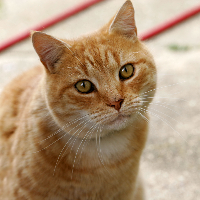

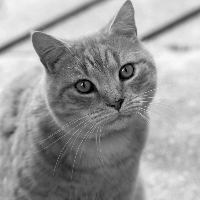

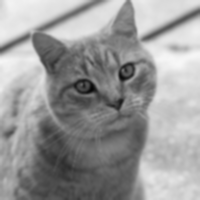

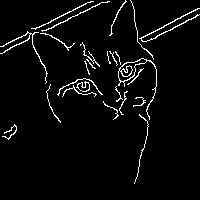

Normalized pixel [0][0] RGB: [0.69019608 0.81176471 0.84705882]


In [10]:
# Image preprocessing steps
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

# Step 1: Read the image from URL
url = 'https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg'
resp = urllib.request.urlopen(url)
img_array = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Step 2: Resize
resized = cv2.resize(img, (200, 200))
cv2_imshow(resized)

# Step 3: Convert to Grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Step 4: Blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(blur)

# Step 5: Edge Detection
edges = cv2.Canny(blur, 100, 200)
cv2_imshow(edges)

# Step 6: Normalization (for ML models)
normalized = resized / 255.0
print("Normalized pixel [0][0] RGB:", normalized[0][0])


Upload apple and banana images:


Saving apple_2.jpg to apple_2 (1).jpg
Saving apple_3.jpg to apple_3 (1).jpg
Saving banana_2.jpg to banana_2 (1).jpg
Saving banana_3.jpg to banana_3 (2).jpg
Upload test image:


Saving banana_10.jpg to banana_10.jpg
Predicted: Apple 🍎


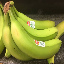

In [15]:
# Import required libraries
import cv2                      # OpenCV for image processing
import numpy as np              # NumPy for number arrays
from sklearn import svm         # Import SVM classifier
from google.colab import files  # To upload files in Colab
from google.colab.patches import cv2_imshow  # To display images in Colab

# Step 1: Upload apple and banana images (e.g., apple1.jpg, banana1.jpg)
print("Upload apple and banana images:")
train = files.upload()

X, y = [], []  # X = features, y = labels
for name in train:
  img = cv2.imread(name)                        # Read image
  img = cv2.resize(img, (64, 64))               # Resize to 64x64 pixels
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
  X.append(gray.flatten())                      # Flatten image for model
  y.append(0 if 'apple' in name else 1)         # Label: 0=apple, 1=banana

# Step 2: Train the SVM model
model = svm.SVC()      # Create SVM model
model.fit(X, y)        # Train the model with data

# Step 3: Upload test image
print("Upload test image:")
test = files.upload()

# Step 4: Predict and display result
for name in test:
  img = cv2.imread(name)
  img = cv2.resize(img, (64, 64))
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  pred = model.predict([gray.flatten()])[0]     # Predict label
  label = "Apple 🍎" if pred == 0 else "Banana 🍌"
  print("Predicted:", label)
  cv2_imshow(img)                                # Show image


In [1]:
#open camera
import cv2

cam = cv2.VideoCapture(0)

while True:
    ret, frame = cam.read()
    if not ret:
        print("❌ Failed to access camera.")
        break

    cv2.imshow("Webcam Test", frame)

    if cv2.waitKey(1) == ord('q'):
        break

cam.release()
cv2.destroyAllWindows()

❌ Failed to access camera.


error: OpenCV(4.11.0) /io/opencv/modules/highgui/src/window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [ ]:
import cv2

f = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
c = cv2.VideoCapture(0)

while True:
    r, i = c.read()
    g = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    for (x, y, w, h) in f.detectMultiScale(g):
        cv2.rectangle(i, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.imshow("Face", i)
    if cv2.waitKey(1) == ord('q'):
        break

c.release()
cv2.destroyAllWindows()
